In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import pickle
import seaborn as sns

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [25]:
def top_30_plot(shaps, features,save_path,fold):
    for i, shap in enumerate(shaps):
        feature_importance = np.mean(np.abs(shap[1]), axis=0)[32:]
        if i == 0:
            df = pd.DataFrame({"Pathway": features, f'Importance{i+1}': feature_importance})
        else:
            df = pd.concat([df,pd.DataFrame({f'Importance{i+1}': feature_importance})],axis=1)
    df['median'] = df.iloc[:, 1:11].median(axis=1)
    df = df.sort_values(by="median", ascending=False)
    top30 = df.head(30).iloc[::-1]
    top30.set_index('Pathway', inplace=True)
    plt.figure(figsize=(5, 10))
    plt.boxplot(top30.iloc[:,:fold].T.values, labels=top30.index,vert=False)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 30 Features')
    plt.savefig(save_path,dpi=300)

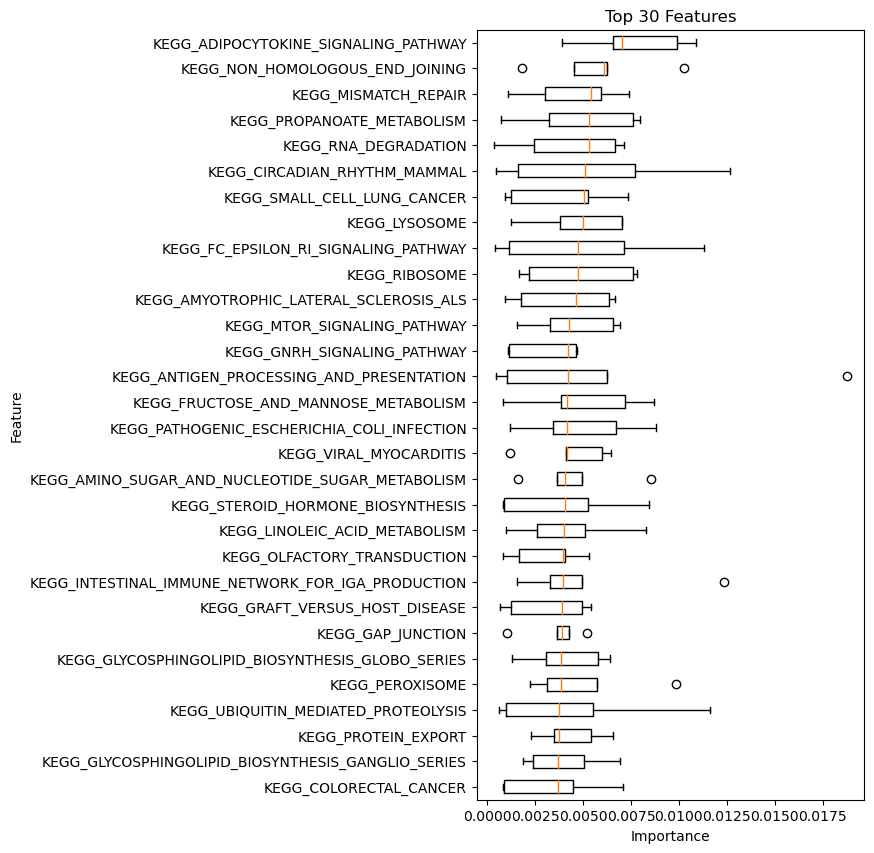

In [26]:
with open("../../results/KEGG/shap.pkl", 'rb') as file:
    shaps = pickle.load(file)
features = pd.read_csv("../../data/pathway_kegg.csv",index_col=0).columns.tolist()
save_path = "../../results/KEGG/pathway_importance.png"
top_30_plot(shaps, features,save_path,5)

In [41]:
with open("../../results/GOBP/shap_GOBP.pkl", 'rb') as file:
    shaps = pickle.load(file)
features = pd.read_csv("../../data/pathway_gobp.csv",index_col=0).columns.tolist()
for i, shap in enumerate(shaps):
    feature_importance = np.mean(np.abs(shap[1]), axis=0)[32:]
    if i == 0:
        df = pd.DataFrame({"Pathway": features, f'Importance{i+1}': feature_importance})
    else:
        df = pd.concat([df,pd.DataFrame({f'Importance{i+1}': feature_importance})],axis=1)

In [42]:
df['mean'] = df.iloc[:, 1:11].mean(axis=1)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,mean
0,GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE,0.000620,0.000600,0.000340,0.000998,0.000125,0.000537
1,GOBP_REPRODUCTION,0.001436,0.000053,0.000066,0.001637,0.000505,0.000739
2,GOBP_SINGLE_STRAND_BREAK_REPAIR,0.001272,0.000318,0.000090,0.000447,0.000794,0.000584
3,GOBP_REGULATION_OF_DNA_RECOMBINATION,0.001803,0.000082,0.000205,0.000399,0.000713,0.000640
4,GOBP_MITOTIC_SPINDLE_ELONGATION,0.000092,0.000590,0.000235,0.000062,0.001052,0.000406
...,...,...,...,...,...,...,...
5448,GOBP_NEGATIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.000118,0.000095,0.000785,0.000853,0.000638,0.000498
5449,GOBP_POSITIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.000141,0.000084,0.000270,0.000920,0.000093,0.000302
5450,GOBP_REGULATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...,0.001373,0.000394,0.000086,0.000378,0.000803,0.000607
5451,GOBP_POSITIVE_REGULATION_OF_CYSTEINE_TYPE_ENDO...,0.001125,0.000150,0.000155,0.000163,0.001056,0.000530


Text(0.5, 1.0, 'Top 20 Features')

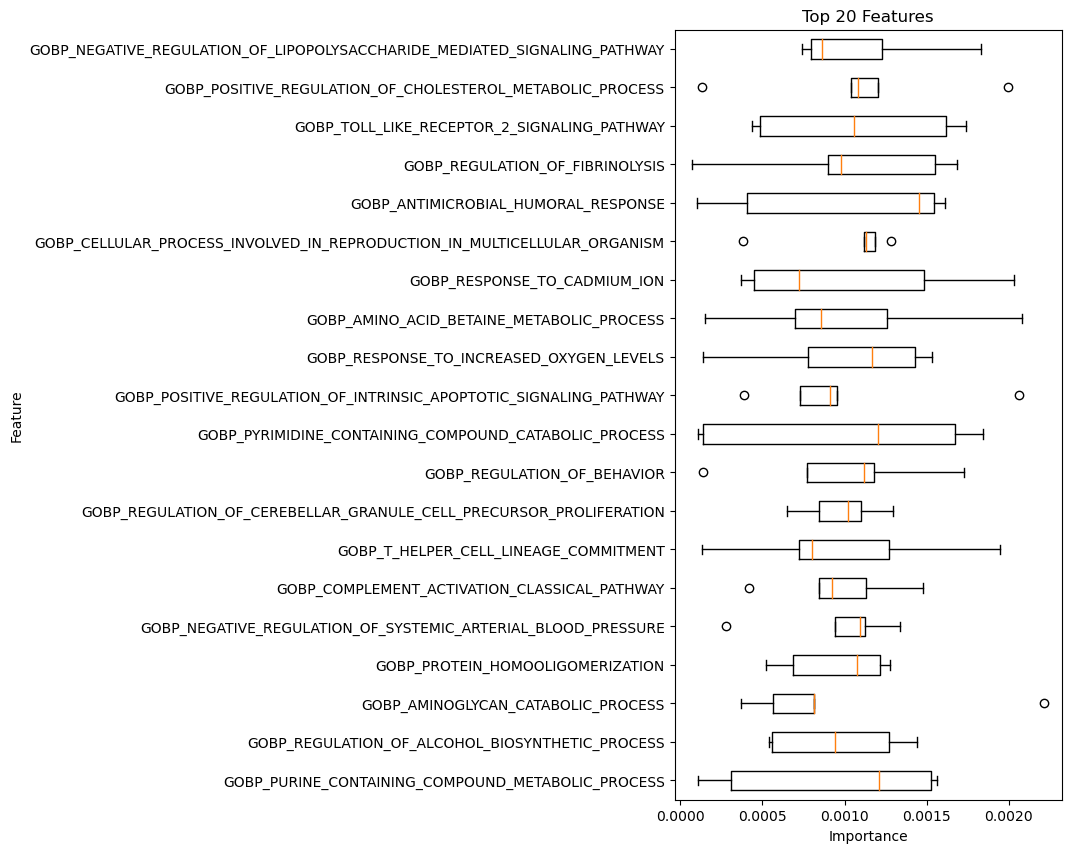

In [43]:

df = df.sort_values(by="mean", ascending=False)
top20 = df.head(20).iloc[::-1]
top20.set_index('Pathway', inplace=True)
plt.figure(figsize=(5, 10))
plt.boxplot(top20.iloc[:,:5].T.values, labels=top20.index,vert=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features')

In [44]:
top20

,Importance1,Importance2,Importance3,Importance4,Importance5,mean
Pathway,,,,,,
GOBP_PURINE_CONTAINING_COMPOUND_METABOLIC_PROCESS,0.001565,0.001211,0.000108,0.000309,0.001525,0.000944
GOBP_REGULATION_OF_ALCOHOL_BIOSYNTHETIC_PROCESS,0.001440,0.000539,0.000940,0.000558,0.001269,0.000949
GOBP_AMINOGLYCAN_CATABOLIC_PROCESS,0.000811,0.000813,0.000366,0.000566,0.002217,0.000955
GOBP_PROTEIN_HOMOOLIGOMERIZATION,0.001217,0.000686,0.001276,0.001073,0.000524,0.000955
GOBP_NEGATIVE_REGULATION_OF_SYSTEMIC_ARTERIAL_BLOOD_PRESSURE,0.001338,0.000944,0.001092,0.001124,0.000280,0.000956
GOBP_COMPLEMENT_ACTIVATION_CLASSICAL_PATHWAY,0.000921,0.000417,0.001131,0.000847,0.001481,0.000959
GOBP_T_HELPER_CELL_LINEAGE_COMMITMENT,0.001945,0.000802,0.001269,0.000131,0.000723,0.000974
GOBP_REGULATION_OF_CEREBELLAR_GRANULE_CELL_PRECURSOR_PROLIFERATION,0.000651,0.001103,0.001296,0.000845,0.001020,0.000983
GOBP_REGULATION_OF_BEHAVIOR,0.000137,0.000771,0.001182,0.001120,0.001728,0.000988


In [36]:
means = top20.iloc[:,:5].mean(axis=1)
errors = top20.iloc[:,:5].std(axis=1)


In [39]:
colors = np.where(means-errors < 0, 'grey', '#1f77b4')

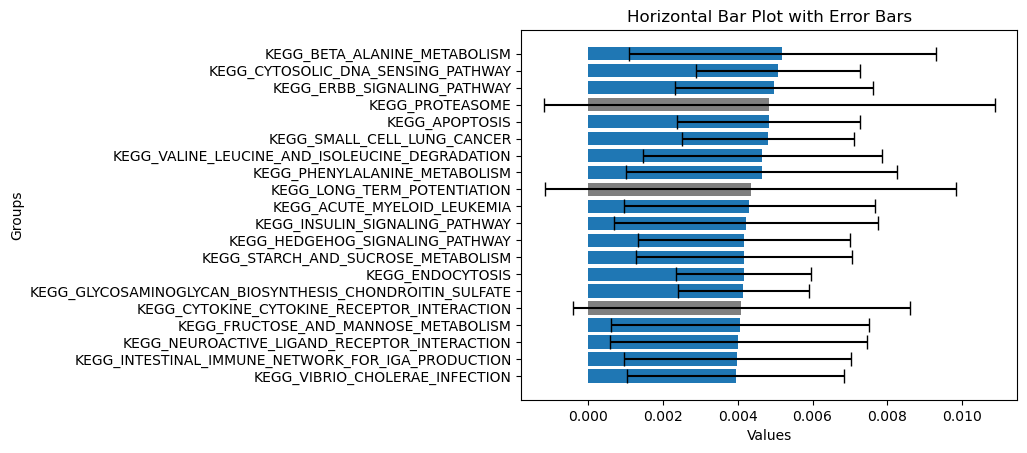

In [40]:
fig, ax = plt.subplots()
bars = ax.barh(top20.index, means, xerr=errors, capsize=5,color=colors)
ax.set_xlabel('Values')
ax.set_ylabel('Groups')
ax.set_title('Horizontal Bar Plot with Error Bars')
plt.show()

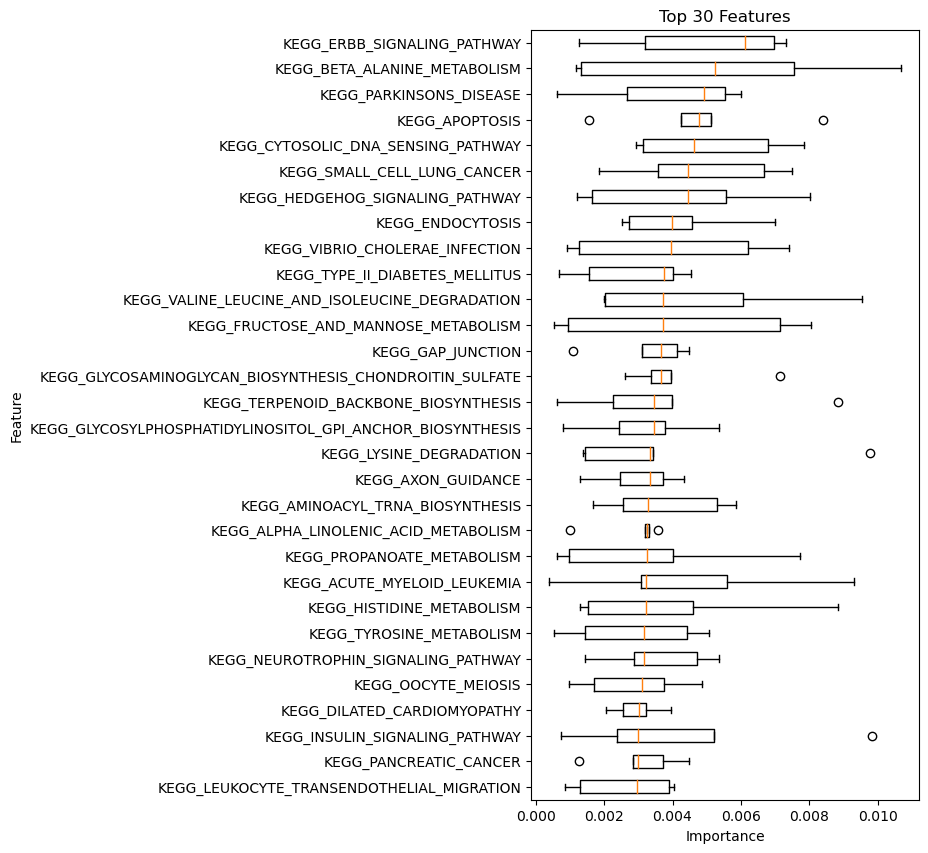

In [52]:
with open("../../results/KEGG/shap_KEGG.pkl", 'rb') as file:
    shaps = pickle.load(file)
features = pd.read_csv("../../data/pathway_kegg.csv",index_col=0).columns.tolist()
save_path = "../../results/KEGG/pathway_importance.png"
top_30_plot(shaps, features,save_path,5)

In [5]:
features[0:10]

['GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE',
 'GOBP_REPRODUCTION',
 'GOBP_SINGLE_STRAND_BREAK_REPAIR',
 'GOBP_REGULATION_OF_DNA_RECOMBINATION',
 'GOBP_MITOTIC_SPINDLE_ELONGATION',
 'GOBP_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY',
 'GOBP_RIBOSOMAL_SMALL_SUBUNIT_ASSEMBLY',
 'GOBP_VERY_LONG_CHAIN_FATTY_ACID_METABOLIC_PROCESS',
 'GOBP_TRANSITION_METAL_ION_TRANSPORT',
 'GOBP_RIBOSOMAL_SUBUNIT_EXPORT_FROM_NUCLEUS']

Text(0.5, 1.0, 'Top 30 Features')

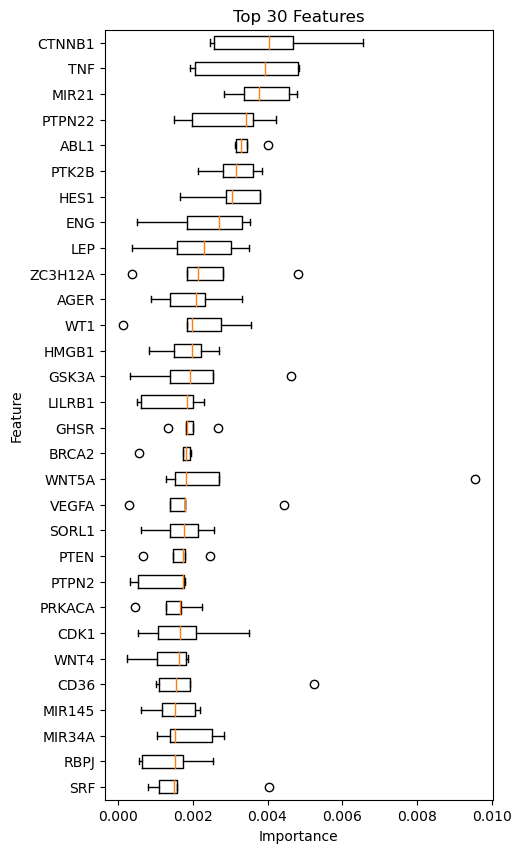

In [5]:
df2 = pd.read_csv("../../results/GO/feature_importance_result.csv",index_col=0)
df2.iloc[:, 1:6]
df2['median'] = df2.iloc[:, 1:6].median(axis=1)
df2 = df2.sort_values(by="median", ascending=False)
top30_2 = df2.head(30).iloc[::-1]
top30_2.set_index('Feature', inplace=True)
plt.figure(figsize=(5, 10))
plt.boxplot(top30_2.iloc[:,:5].T.values, labels=top30_2.index,vert=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features')

In [17]:
pd.read_csv("../../results/GO/result2.csv", index_col=0)

,hyperparam,Fold,Valid_AUC,Valid_Precision,Valid_Recall,Valid_F1,Test_AUC,Test_Precision,Test_Recall,Test_F1,Test_PrAUC
0,lr:0.0005 / num_fc:32,0,0.997619,0.952381,1.00,0.975610,0.986460,0.934783,0.977273,0.955556,0.987273
1,lr:0.0005 / num_fc:32,1,0.995238,1.000000,0.95,0.974359,0.979710,1.000000,0.866667,0.928571,0.982167
2,lr:0.0005 / num_fc:32,2,1.000000,1.000000,1.00,1.000000,0.997101,0.937500,1.000000,0.967742,0.997140
3,lr:0.0005 / num_fc:32,3,1.000000,1.000000,1.00,1.000000,0.985507,0.916667,0.977778,0.946237,0.985111
4,lr:0.0005 / num_fc:32,4,1.000000,1.000000,1.00,1.000000,0.975362,0.880000,0.977778,0.926316,0.978285


In [7]:
result = pd.read_csv("../../results/result_mlp.csv", index_col=0)
result['type'] = 'PROMINENT w/o pathway'
result0 = pd.read_csv("../../results/KEGG/result2.csv", index_col=0)
result0['type'] = 'PROMINENT_KEGG'
result1 = pd.read_csv("../../results/GO/result2.csv", index_col=0)
result1['type'] = 'PROMINENT_GOBP'
result2 = pd.read_csv("../../methylnet/results.csv", index_col=0)
result2['type'] = 'MethylNet'
result3 = pd.read_csv("../../ELnet_results.csv", index_col=0)
result3['type'] = 'ElasticNet'

,Test_AUC,Test_Precision,Test_Recall,Test_F1,Test_PrAUC,type
Fold1,0.986944,0.975610,0.909091,0.941176,0.974347,MethylNet
Fold2,0.986957,0.954545,0.933333,0.943820,0.988346,MethylNet
Fold3,0.958937,0.947368,0.800000,0.867470,0.952139,MethylNet
Fold4,0.920773,0.972222,0.777778,0.864198,0.911839,MethylNet
Fold5,0.974879,0.974359,0.844444,0.904762,0.982072,MethylNet


In [8]:
df = pd.concat([result.iloc[:,-6:],result0.iloc[:,-6:],result1.iloc[:,-6:],result2.iloc[:,-6:],result3.iloc[:,-6:]],axis=0)
df

,Test_AUC,Test_Precision,Test_Recall,Test_F1,Test_PrAUC,type
0,0.981141,0.975610,0.909091,0.941176,0.984033,PROMINENT w/o pathway
1,0.968599,1.000000,0.911111,0.953488,0.977317,PROMINENT w/o pathway
2,0.966667,0.893617,0.933333,0.913043,0.970054,PROMINENT w/o pathway
3,0.977778,0.934783,0.955556,0.945055,0.978650,PROMINENT w/o pathway
4,0.966184,0.974359,0.844444,0.904762,0.971749,PROMINENT w/o pathway
0,0.990812,1.000000,0.909091,0.952381,0.991103,PROMINENT_KEGG
1,0.992271,0.956522,0.977778,0.967033,0.992996,PROMINENT_KEGG
2,0.985024,0.953488,0.911111,0.931818,0.986139,PROMINENT_KEGG
3,0.988889,0.918367,1.000000,0.957447,0.987457,PROMINENT_KEGG
4,0.969565,0.951220,0.866667,0.906977,0.972281,PROMINENT_KEGG


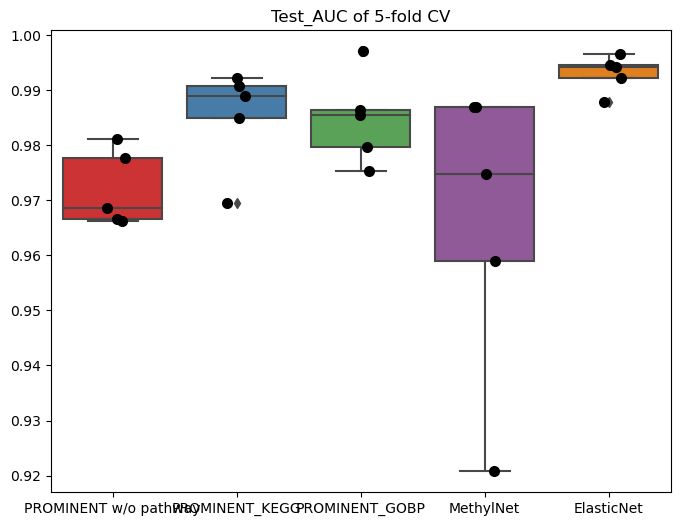

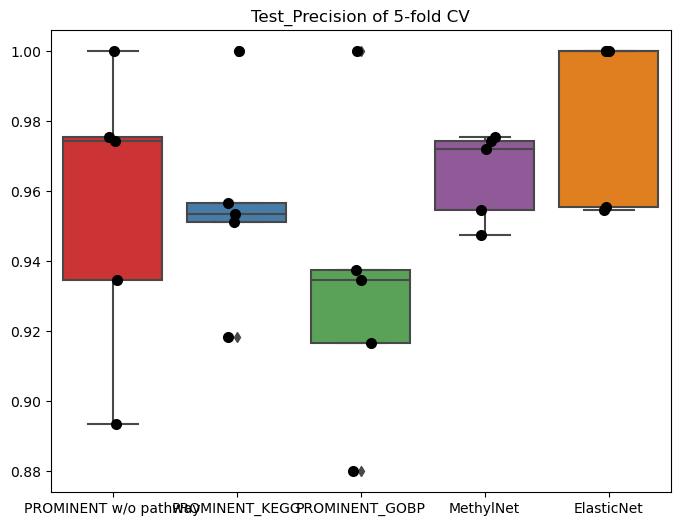

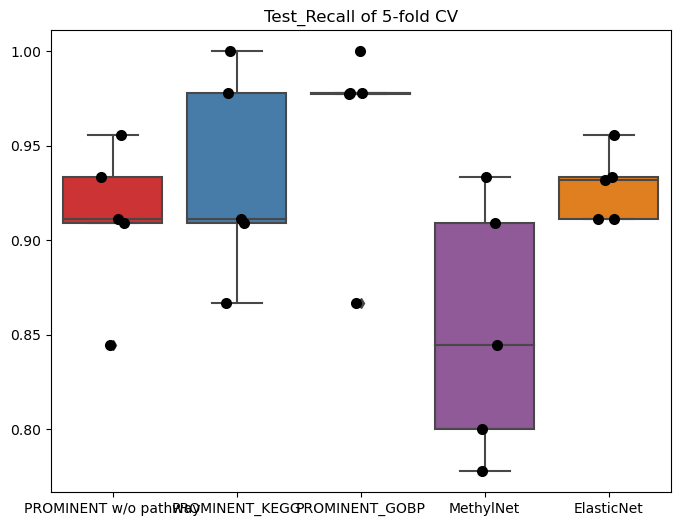

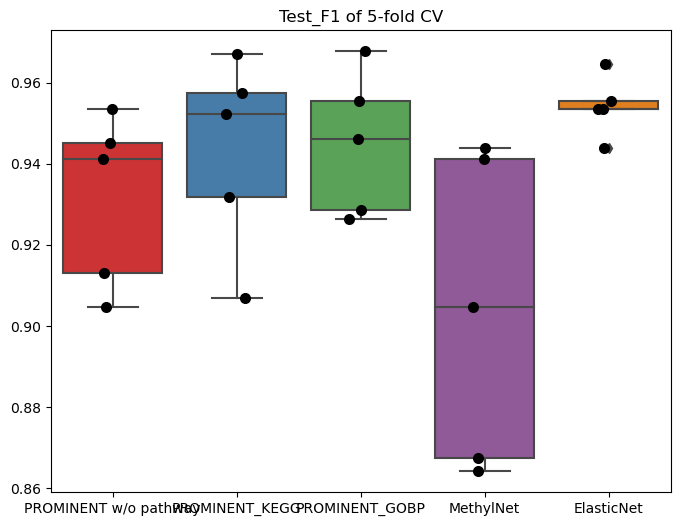

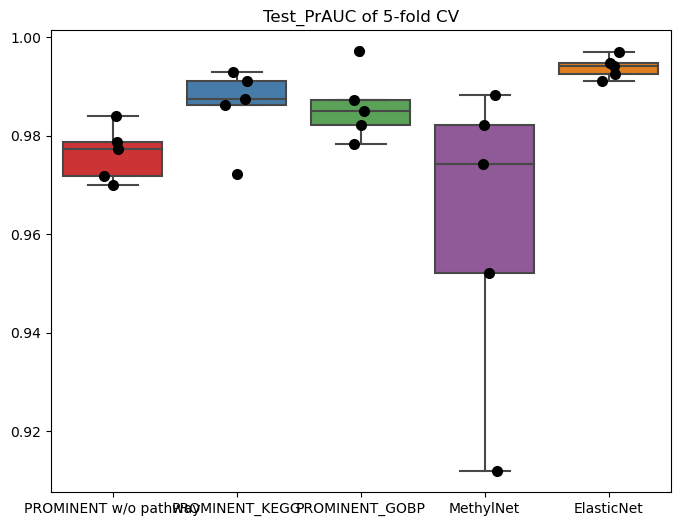

In [9]:
for score in ["Test_AUC","Test_Precision","Test_Recall","Test_F1", "Test_PrAUC"]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='type', y=score, data=df[["type",score]], palette='Set1')
    sns.stripplot(x='type', y=score, data=df[["type",score]], color='black', size=8, jitter=True)

    # Set plot labels and title
    plt.title(f'{score} of 5-fold CV')
    #plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig(f'../../results/{score}.png')
    # Show the plot
    plt.show()
    

In [3]:
result_ELnet.columns = result_methylnet.columns

In [5]:
result.iloc[:,-5:]

,Test_AUC,Test_Precision,Test_Recall,Test_F1,type
0,0.994344,0.958333,1.000000,0.978723,MLP w/o pathway
1,0.979145,0.984375,0.913043,0.947368,MLP w/o pathway
2,0.988043,0.958333,1.000000,0.978723,MLP w/o pathway
3,0.964855,0.970588,0.956522,0.963504,MLP w/o pathway
4,0.964493,0.970588,0.956522,0.963504,MLP w/o pathway


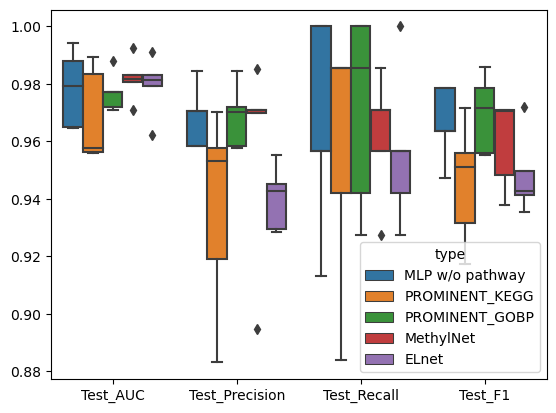

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
perf = pd.concat([result.iloc[:,-5:],result0.iloc[:,-5:],result1.iloc[:,-5:],result_methylnet,result_ELnet.iloc[0:5,:]],axis=0)
df_long = pd.melt(perf, id_vars='type', var_name='Measurement', value_name='Value')
sns.boxplot(x='Measurement', y='Value', hue = 'type', data=df_long)
plt.xlabel('')
plt.ylabel('')
plt.savefig('../../results/IPF_performance.pdf',format="pdf")

In [12]:
df_long.to_csv("../../results/df_long.csv",index=None)

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.


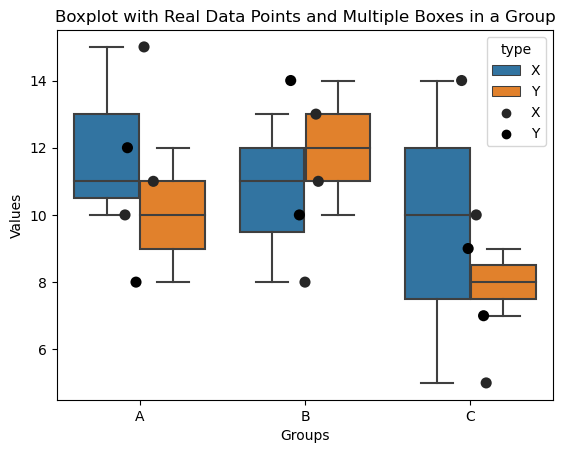

In [9]:
# Sample DataFrame (replace this with your own data)
data = {'A': [10, 12, 15, 8, 11],
        'B': [8, 14, 11, 10, 13],
        'C': [5, 9, 14, 7, 10],
        'type': ['X', 'Y', 'X', 'Y', 'X']}

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e'])

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df.reset_index(), id_vars=['index', 'type'], var_name='Group', value_name='Values')

# Create a boxplot with real data points and multiple boxes in a group
fig, ax = plt.subplots()
sns.boxplot(x='Group', y='Values', hue='type', data=df_melted, ax=ax)
sns.stripplot(x='Group', y='Values', hue='type', data=df_melted, ax=ax, color='black', size=8, jitter=True)

# Add labels and title
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Boxplot with Real Data Points and Multiple Boxes in a Group')

# Show the plot
plt.show()

In [11]:
for i, shap in enumerate(shaps):
  fi = np.mean(np.abs(shap[1]), axis=0)[32:]
  if i == 0:
    df = pd.DataFrame({"Pathway": features, f'Importance{i+1}': fi})
  else:
    df = pd.concat([df,pd.DataFrame({f'Importance{i+1}': fi})],axis=1)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10
0,GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE,0.000228,0.000188,0.000503,0.000873,0.000371,0.000410,0.000383,0.000221,0.000497,0.000088
1,GOBP_REPRODUCTION,0.001079,0.000115,0.000353,0.001466,0.000071,0.000454,0.000995,0.000740,0.000722,0.000168
2,GOBP_SINGLE_STRAND_BREAK_REPAIR,0.000807,0.000074,0.001154,0.000379,0.000319,0.000061,0.000292,0.000501,0.000385,0.000461
3,GOBP_REGULATION_OF_DNA_RECOMBINATION,0.001138,0.000122,0.000109,0.000416,0.000088,0.000510,0.000538,0.000469,0.000226,0.000051
4,GOBP_MITOTIC_SPINDLE_ELONGATION,0.000301,0.000451,0.000567,0.000154,0.000077,0.000603,0.000474,0.000166,0.000302,0.000396
...,...,...,...,...,...,...,...,...,...,...,...
5448,GOBP_NEGATIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.000096,0.001021,0.000643,0.000249,0.000198,0.000154,0.000248,0.000093,0.000258,0.000437
5449,GOBP_POSITIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.000114,0.000398,0.000102,0.000307,0.000057,0.000743,0.000060,0.000091,0.000976,0.000189
5450,GOBP_REGULATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...,0.001599,0.000463,0.000386,0.000063,0.000716,0.000383,0.000073,0.000110,0.000183,0.000158
5451,GOBP_POSITIVE_REGULATION_OF_CYSTEINE_TYPE_ENDO...,0.000888,0.000214,0.000396,0.002285,0.000079,0.000490,0.000533,0.000188,0.000546,0.000074


In [13]:
df['mean'] = df.iloc[:, 1:11].mean(axis=1)
df['median'] = df.iloc[:, 1:11].median(axis=1)
df = df.sort_values(by="mean", ascending=False)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean,median
1983,GOBP_REGULATION_OF_INTRACELLULAR_TRANSPORT,0.001007,0.000874,0.000703,0.001847,0.000512,0.000778,0.000505,0.001054,0.000400,0.000894,0.000857,0.000826
3421,GOBP_POSITIVE_REGULATION_OF_PEPTIDYL_TYROSINE_...,0.000429,0.001109,0.001454,0.002040,0.000898,0.000135,0.000485,0.000236,0.000644,0.000542,0.000797,0.000593
1216,GOBP_REGULATION_OF_CELLULAR_CARBOHYDRATE_METAB...,0.000563,0.001334,0.002230,0.001327,0.000039,0.000197,0.000791,0.000698,0.000586,0.000045,0.000781,0.000642
4169,GOBP_POSITIVE_REGULATION_OF_PROTEIN_EXIT_FROM_...,0.000425,0.001567,0.000520,0.000925,0.000580,0.000617,0.000547,0.000391,0.001585,0.000582,0.000774,0.000581
3934,GOBP_EPITHELIAL_CELL_DIFFERENTIATION_INVOLVED_...,0.001115,0.000066,0.000529,0.002617,0.000311,0.000265,0.000146,0.000454,0.000114,0.002112,0.000773,0.000382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,GOBP_DICARBOXYLIC_ACID_BIOSYNTHETIC_PROCESS,0.000080,0.000274,0.000130,0.000138,0.000056,0.000064,0.000112,0.000330,0.000078,0.000221,0.000148,0.000121
2887,GOBP_MITOTIC_G2_M_TRANSITION_CHECKPOINT,0.000222,0.000294,0.000161,0.000090,0.000177,0.000095,0.000157,0.000150,0.000086,0.000036,0.000147,0.000154
5154,GOBP_REGULATION_OF_ADIPOSE_TISSUE_DEVELOPMENT,0.000138,0.000076,0.000421,0.000076,0.000075,0.000098,0.000231,0.000063,0.000210,0.000033,0.000142,0.000087
3397,GOBP_CATECHOLAMINE_SECRETION,0.000045,0.000082,0.000127,0.000214,0.000110,0.000247,0.000199,0.000086,0.000068,0.000125,0.000130,0.000117


In [17]:
top30 = df.head(30).iloc[::-1].iloc[:,:-2]
top30.set_index('Pathway', inplace=True)
top30

,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10
Pathway,,,,,,,,,,
GOBP_CELL_ADHESION,0.000655,0.000744,0.000494,0.001463,0.000524,0.001406,0.000352,0.000609,0.000191,0.000171
GOBP_RIBONUCLEOPROTEIN_COMPLEX_BIOGENESIS,0.000071,0.000313,0.000625,0.002520,0.000435,0.000157,0.000299,0.000995,0.001081,0.000127
GOBP_NEGATIVE_REGULATION_OF_PHOSPHATIDYLINOSITOL_3_KINASE_SIGNALING,0.000049,0.001266,0.000351,0.001815,0.000607,0.000141,0.000700,0.000715,0.000300,0.000689
GOBP_GLIAL_CELL_APOPTOTIC_PROCESS,0.000734,0.001077,0.000623,0.001141,0.000745,0.000056,0.000351,0.000448,0.000515,0.000965
GOBP_CELLULAR_HYPOTONIC_RESPONSE,0.000299,0.000978,0.000720,0.000167,0.000164,0.001004,0.000191,0.001106,0.001021,0.001032
GOBP_COENZYME_A_METABOLIC_PROCESS,0.000180,0.000195,0.001332,0.002105,0.000075,0.000801,0.000039,0.001154,0.000130,0.000683
GOBP_NEGATIVE_REGULATION_OF_PLASMA_MEMBRANE_BOUNDED_CELL_PROJECTION_ASSEMBLY,0.000446,0.000372,0.000502,0.001658,0.000081,0.000416,0.000984,0.000138,0.001220,0.000913
GOBP_REGULATION_OF_BONE_MINERALIZATION,0.000479,0.000902,0.000322,0.001576,0.000868,0.000589,0.000057,0.000329,0.001270,0.000337
GOBP_HEAD_MORPHOGENESIS,0.000283,0.000515,0.000832,0.000778,0.000596,0.000926,0.000816,0.000889,0.000487,0.000669


In [9]:
df.to_csv("../../results/GOBP/IPF_GOBP_sorted_by_median.csv",index=None)

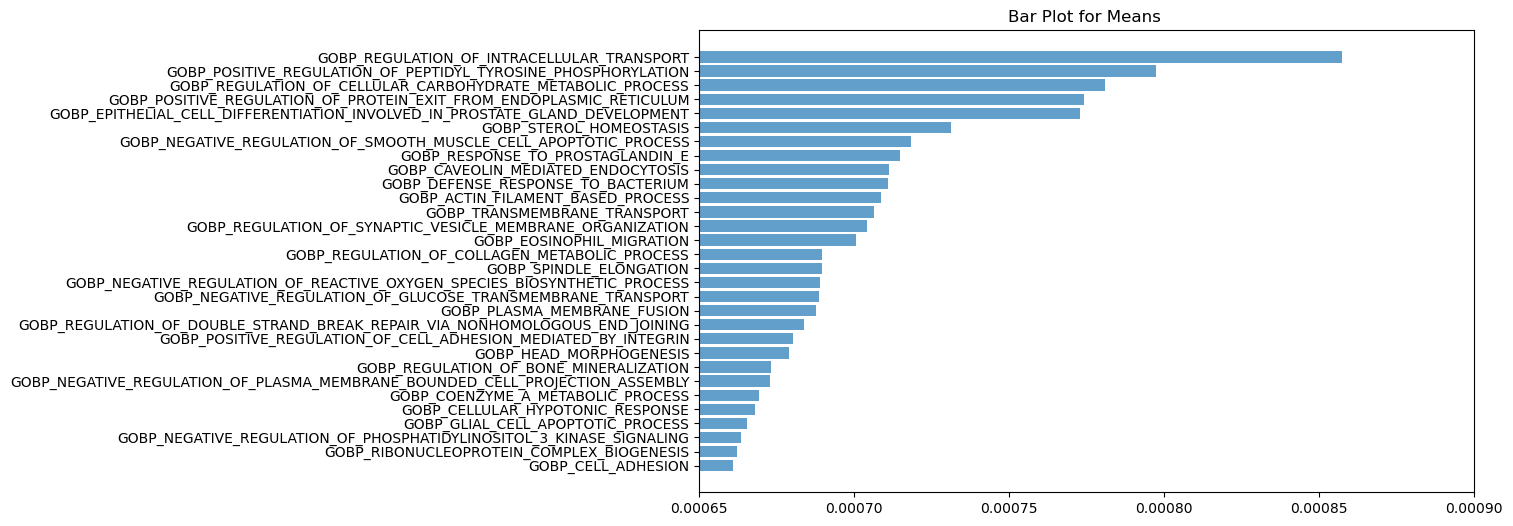

In [25]:
mean_values = top30.mean(axis=1)
std_values = top30.std(axis=1)
plt.figure(figsize=(10, 6))
plt.barh(mean_values.index, mean_values, yerr=std_values, alpha=0.7)

plt.title('Bar Plot for Means ')
plt.xlim(0.00065, 0.0009)
plt.show()

Text(0.5, 1.0, 'Top 30 Features')

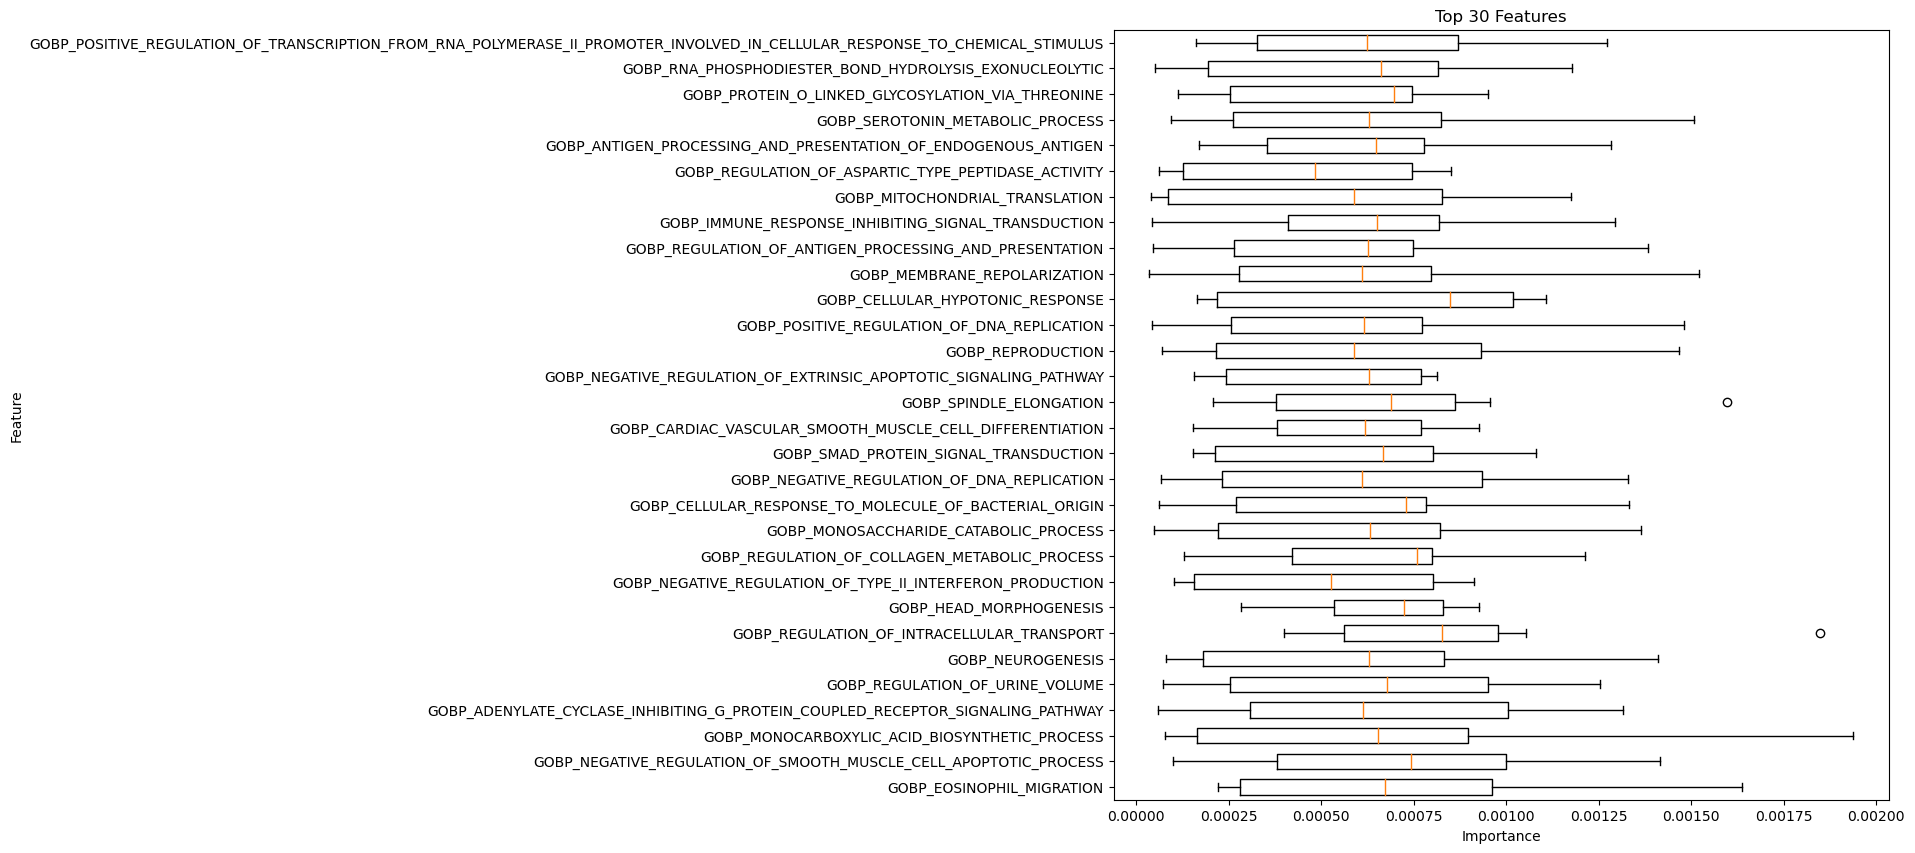

In [11]:
top30 = df.head(30).iloc[:,:11]
top30.set_index('Pathway', inplace=True)
plt.figure(figsize=(10, 10))
label_positions = np.arange(len(top30))
for label, row in zip(label_positions, top30.values):
    plt.boxplot(row, positions=[label], widths=0.6, vert=False)

plt.yticks(label_positions, top30.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features')
#plt.savefig('top_30_path.png',dpi=300)

In [15]:
#df.to_csv("../../results/KEGG_Pathway_importance_IPF.csv",index=None)

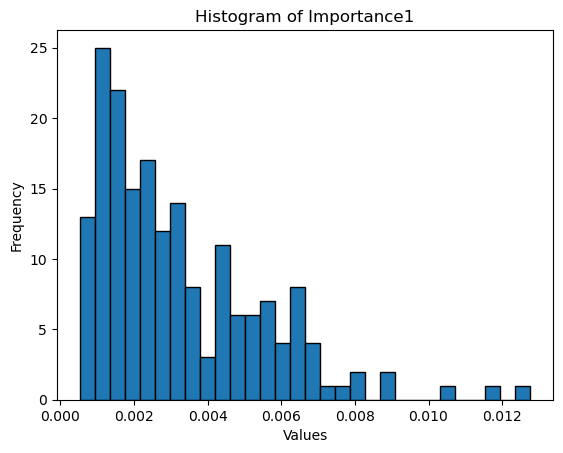

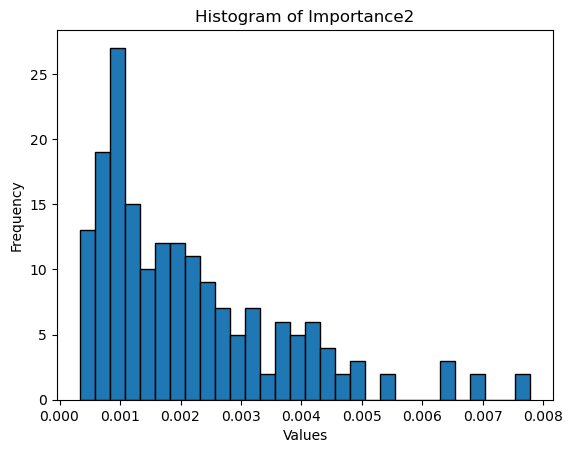

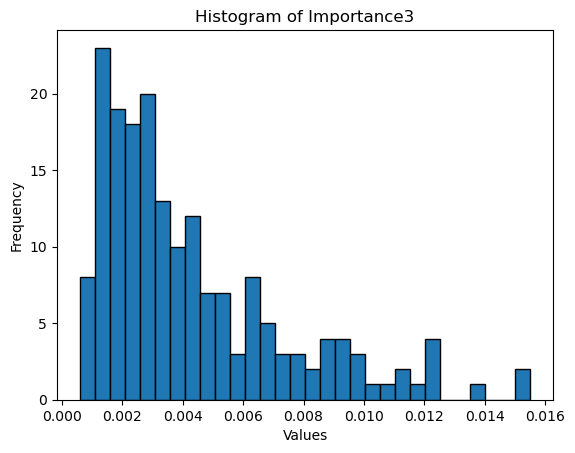

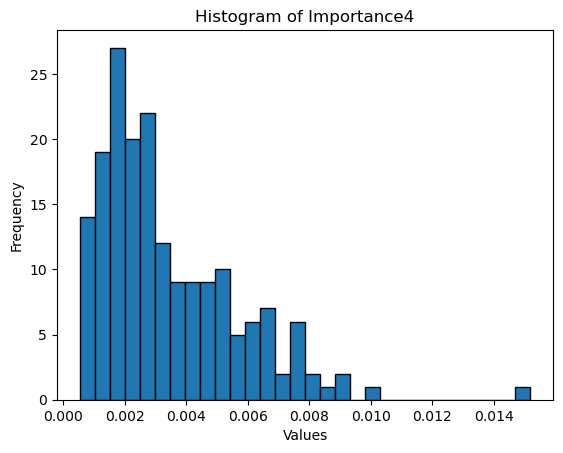

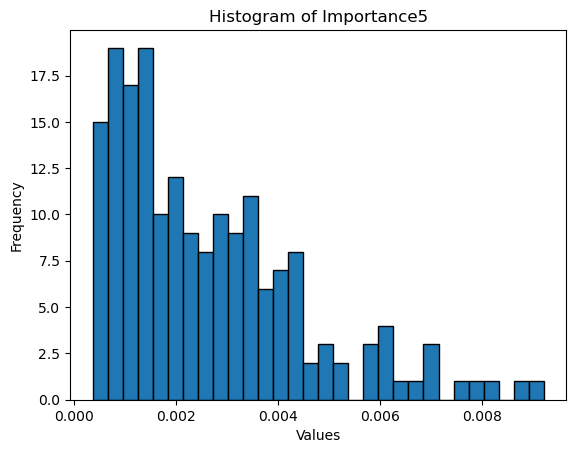

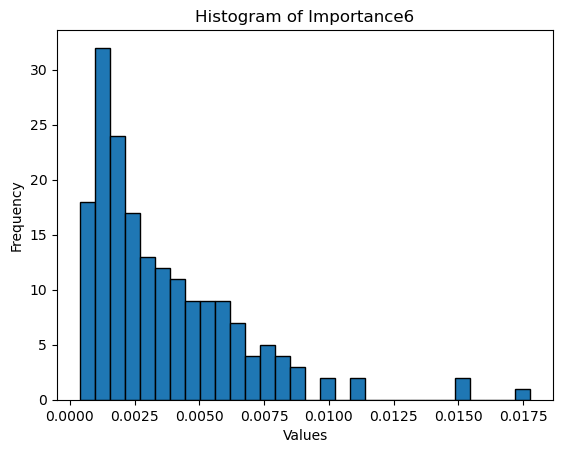

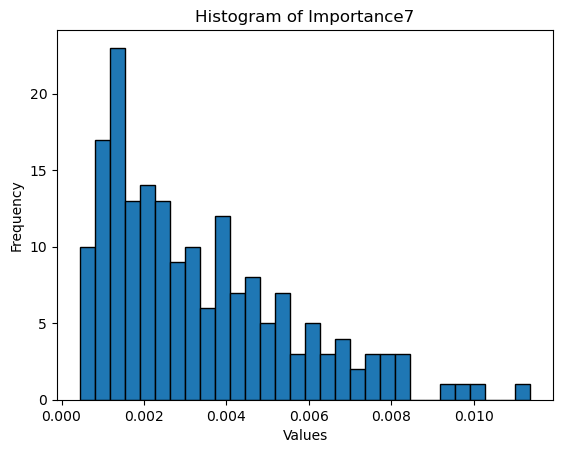

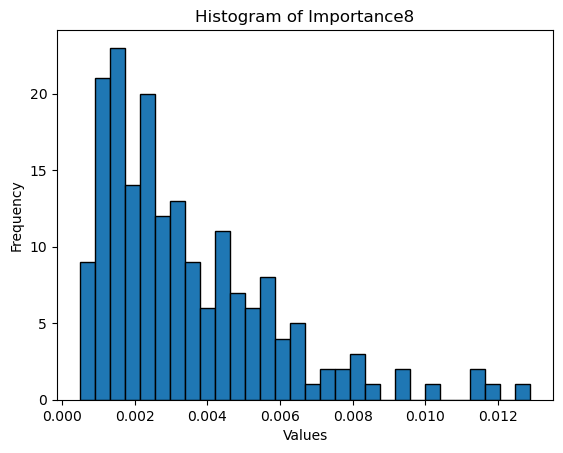

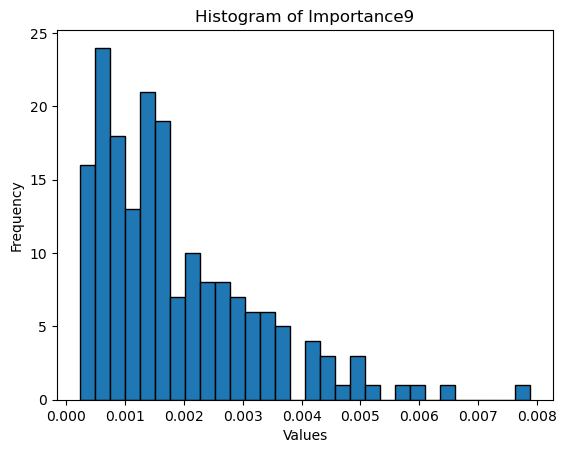

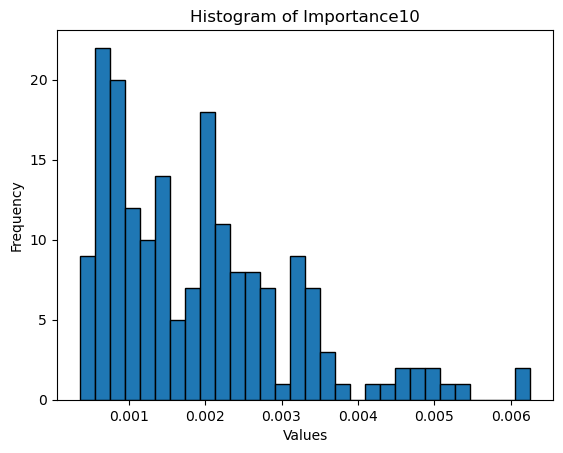

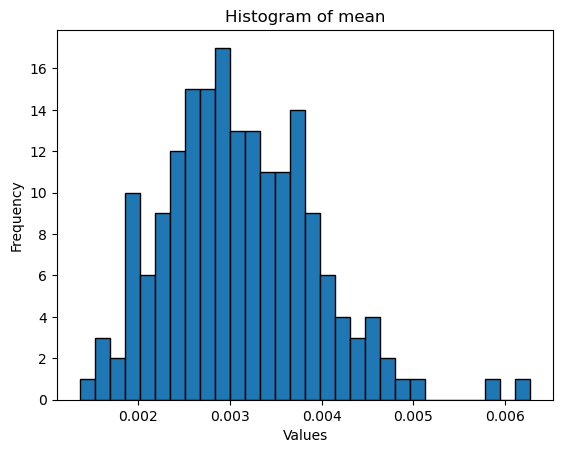

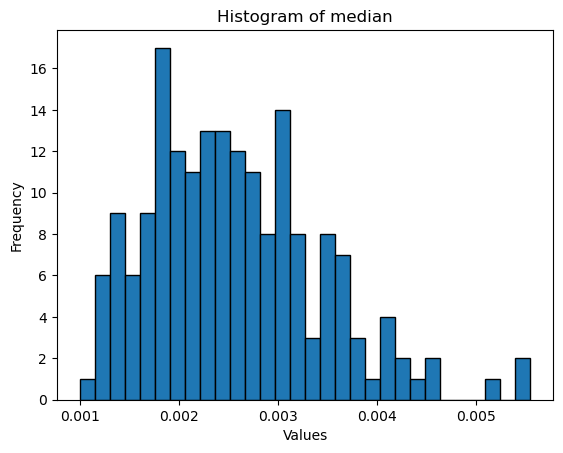

In [20]:
for k in df.columns[1:]:
    column_to_plot = df[k]

    # Plot a histogram
    plt.hist(column_to_plot, bins=30, edgecolor='black') 
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {k}')
    plt.show()

In [2]:
feat_imp = pd.read_csv("../../results/feature_importance_result.csv")
feat_imp

,Unnamed: 0,Feature,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean
0,21528,MAP2K2,0.007868,0.014722,0.022379,0.002553,0.005238,0.025835,0.001445,0.010472,0.002148,0.001051,0.010295
1,19307,ST3GAL2,0.004748,0.011328,0.011930,0.004497,0.014137,0.008835,0.005790,0.012955,0.000676,0.003029,0.008322
2,15974,ALDH2,0.012191,0.002195,0.002168,0.011839,0.004643,0.001658,0.019357,0.009297,0.008150,0.003706,0.007944
3,18966,MAPK3,0.003768,0.004278,0.025878,0.002336,0.004738,0.002393,0.009515,0.013875,0.002844,0.001340,0.007736
4,9978,PIK3CG,0.017429,0.008741,0.008470,0.003877,0.003371,0.002713,0.005190,0.009751,0.004062,0.001802,0.007067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24723,20887,MIR4730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24724,14334,MIR3664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24725,14333,SHANK2-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24726,14320,LINC01488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


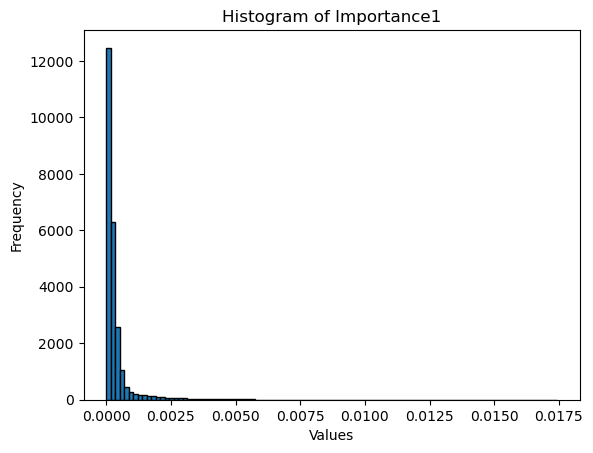

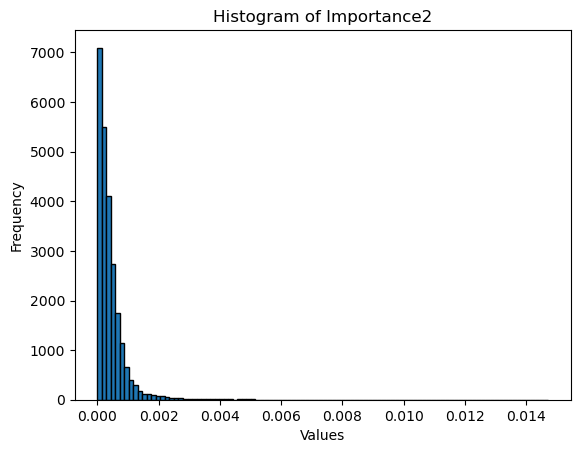

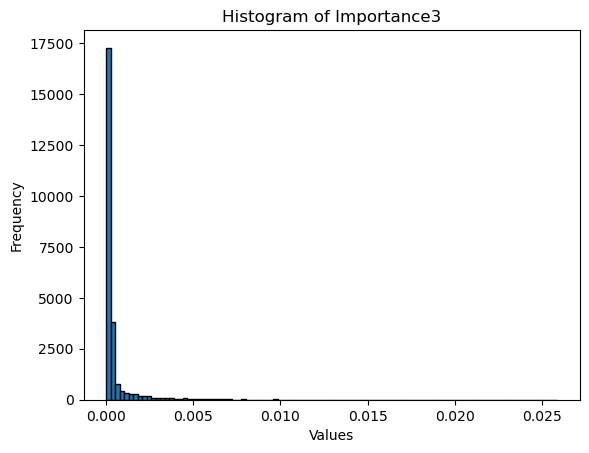

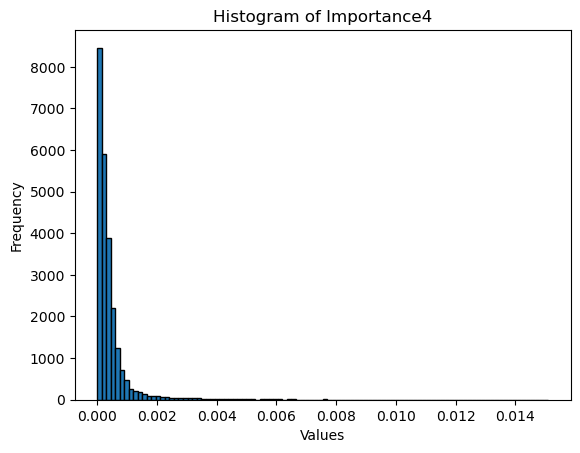

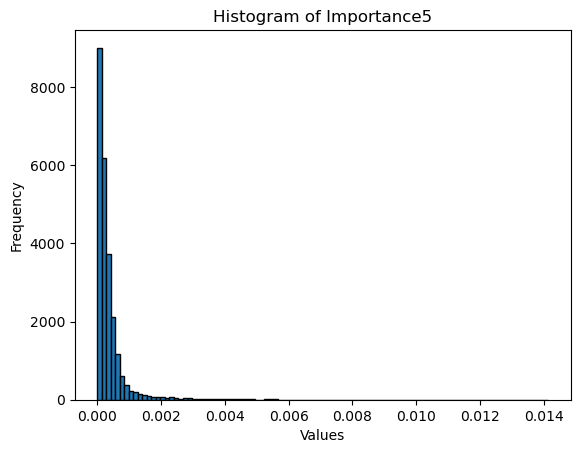

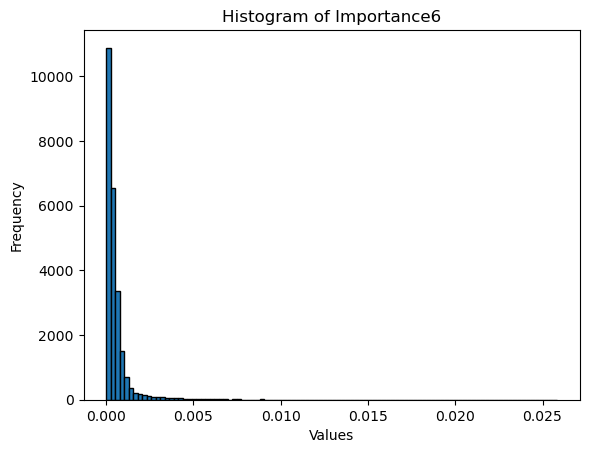

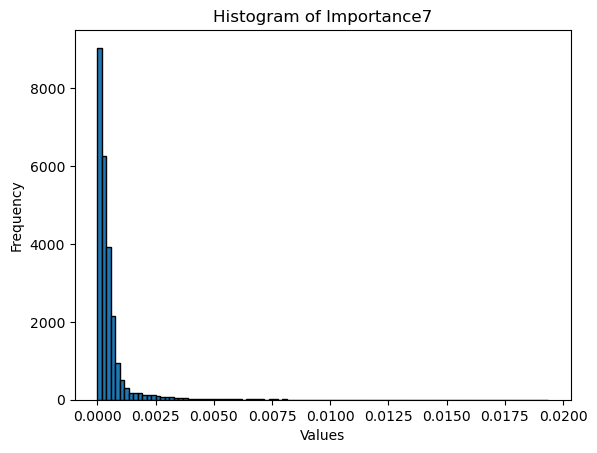

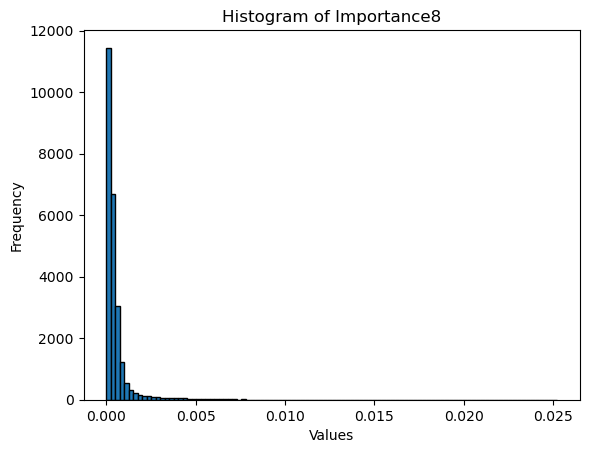

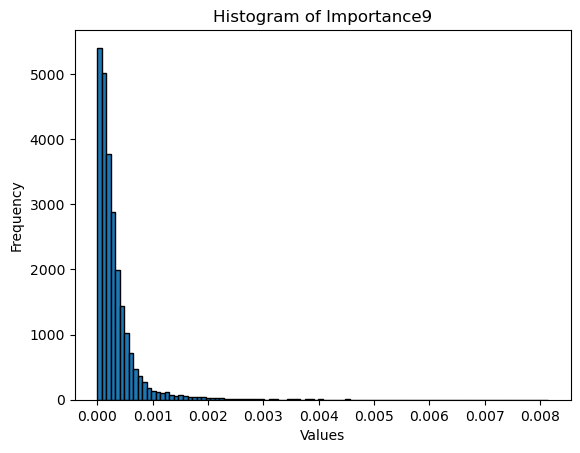

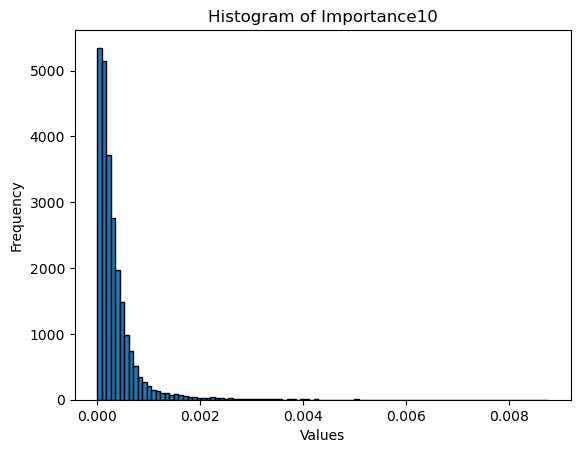

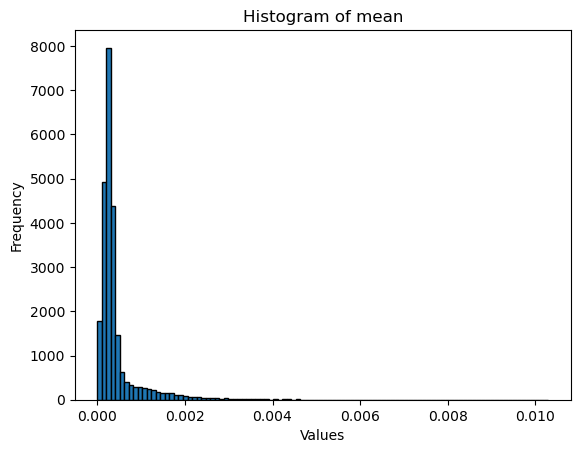

In [4]:
for k in feat_imp.columns[2:]:
    column_to_plot = feat_imp[k]
    plt.hist(column_to_plot, bins=100, edgecolor='black') 
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {k}')
    plt.show()